In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_csv("DV - Fraud Analyst Test - data.csv")

# Explore data
Try to understand what is normal activity for each site, maybe construct a baseline

In [3]:
df.head()

,UserId,Device Model,Browser,OS,User-Agent,IP,IP-country,Site,HourId
0,29670797,Desktop,Chrome,Windows,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,107.77.228.159,United States,a.com,7
1,28970770,Desktop,Chrome,Mac,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,24.114.99.243,Canada,a.com,12
2,13222192,Samsung Galaxy J7 (2017),Other,Android,Mozilla/5.0 (Linux; Android 8.1.0; SAMSUNG SM-...,97.103.218.154,United States,a.com,3
3,27951845,Desktop,Firefox,Windows,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,157.44.13.85,India,a.com,14
4,29057958,Apple iPhone,Safari,iOS,Mozilla/5.0 (iPhone; CPU iPhone OS 12_0_1 like...,162.196.143.222,United States,a.com,7


## Traffic by hour

In [4]:
# groupby
df_by_hour = df.groupby(by=["Site", "HourId\xa0"]).count().iloc[:,0].unstack(level=0)

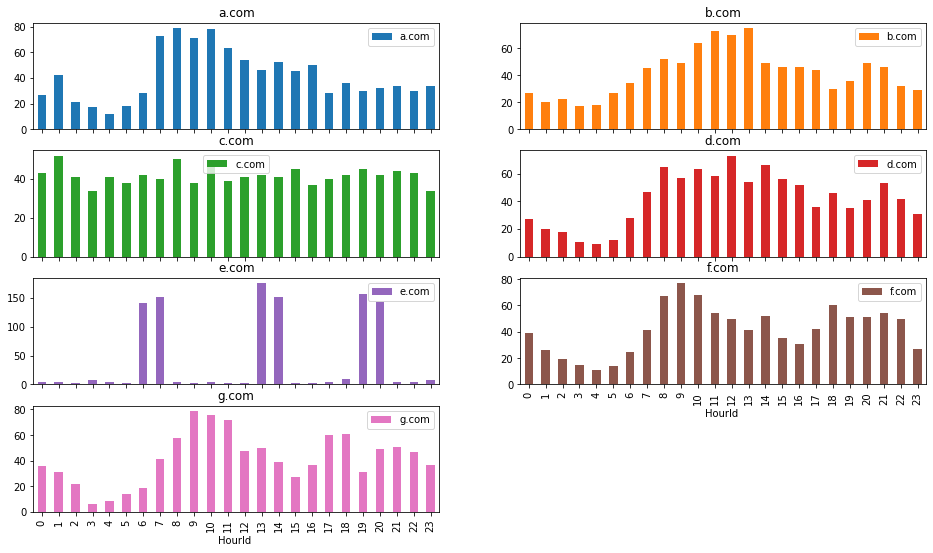

In [5]:
# plot
df_by_hour.plot(subplots=True, layout=(4,2), figsize=(16,9), kind="bar")
plt.show()

## Unique users

<AxesSubplot:xlabel='Site'>

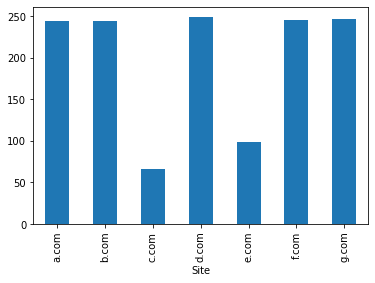

In [6]:
df.groupby(by="Site")["UserId"].nunique().plot(kind="bar")

## Unique IPs

<AxesSubplot:xlabel='Site'>

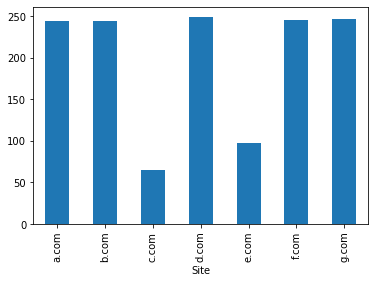

In [7]:
df.groupby(by="Site")["IP"].nunique().plot(kind="bar")

## Unique UAs
It's better to look into user agents, it's normally determined by the combination of OS, browser and device.

<AxesSubplot:xlabel='Site'>

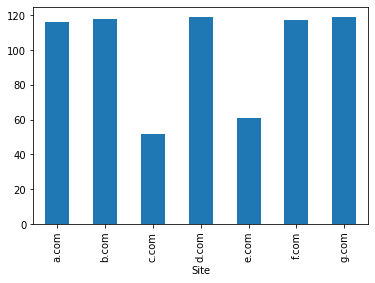

In [8]:
df.groupby(by="Site")["User-Agent"].nunique().plot(kind="bar")

## Unique device models

<AxesSubplot:xlabel='Site'>

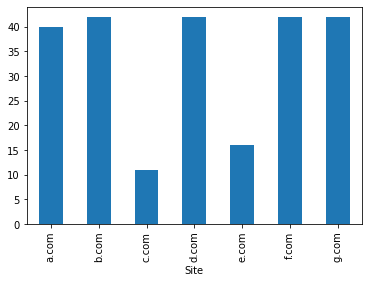

In [9]:
df.groupby(by="Site")["Device Model"].nunique().plot(kind="bar")

The first thing that sticks out is the peculiar traffic pattern to e.com. My basic assumption is that all sites are "normal" and should have similarities in their traffic patterns. Site e.com is definitely different than the rest. It has 3 spikes in traffic amount, while most hours the traffic is nearly 0. It doesn't mean this is abnormal activity, but it is definitely raises questions.

Looking at unique users, IPs, user agents and devices - we can see that e.com continues to be unusual, comparing to all other sites. Site c.com is similar to e.com in these visualizations, and a second look on c.com traffic patterns shows it also has unusual traffic, although it's harder to spot in a quick look, because no distinct spikes in there.

We can see a very distinct rise in traffic in early morning hours for all sites, but c.com and e.com. Which makes sense because people tend to sleep at night, and then go online in the morning to catch up with news and social media.

# Deeper look into e.com
I want to examine e.com traffic in a closer look, and see if there are more indicators for suspicious activity.

In [10]:
df_e = df[df["Site"] == "e.com"]

## IPs

In [11]:
df_e["IP"].value_counts().nlargest(20)

52.23.63.10        750
52.23.63.197        25
52.23.63.198        24
52.23.63.195        20
52.23.63.199        20
52.23.63.196        19
52.23.63.200        18
52.23.63.194        16
52.23.63.193         8
162.196.143.222      3
96.42.226.14         2
174.233.13.40        2
69.158.246.234       2
107.72.178.142       2
69.141.167.31        2
54.84.167.37         2
178.196.20.240       2
165.225.50.94        2
69.17.243.114        2
67.209.30.79         2
Name: IP, dtype: int64

In [12]:
df_e["IP"].str.contains(pat="52.23.63").sum()

900

## Browsers

In [13]:
# for e.com only
df_e["Browser"].value_counts()

Firefox              762
Chrome               197
Safari                26
Internet Explorer      7
Other                  4
Chrome Web View        3
Safari Web View        1
Name: Browser, dtype: int64

In [14]:
# for all sites
df["Browser"].value_counts()

Chrome               3055
Safari               1908
Firefox              1102
Internet Explorer     360
Other                 332
Safari Web View       172
Chrome Web View        71
Name: Browser, dtype: int64

## Distribution of users

In [15]:
df_e["UserId"].value_counts().nlargest(20)

28463371    260
29479236    246
26989700    244
28034571     25
24871383     24
23404441     20
26928469     20
28457180     19
25403294     18
26954816     16
24502491      8
29057958      3
29258275      2
28363241      2
29666109      2
26848453      2
28469553      2
27874604      2
26344772      2
29675479      2
Name: UserId, dtype: int64

## Conclusion for e.com

900 (90%) of the logs have the same IP pattern 52.23.63, and one specific IP (52.23.63.10) accounts for 75% of traffic. A quick google search shows that this is an AWS IP, one of the largest cloud providers. It is possible that an AWS user is using their platform to run their malicious bots on e.com.

In addition, most of the traffic comes from Firefox browser (76%). This is also unusual in comparison to the "normal". If we take a look at the most used browser for *all* sites, we see that Chrome is 1st, Safari is 2d and Firefox is only 3rd. I would expect to see a somewaht similar distribution on each individual site.

If this is not enough, we can also see that about 75% of the traffic was generated by only 3 users.

Conclusion: There's defenitely something abnormal about e.com. It's not necessarily bad activity - I'll need more details (site type and services, user activity on the site, etc.) on this site to determine that, but this is definitely not normal users traffic, worth looking into.

# Deeper look into c.com

In [16]:
df_c = df[df["Site"] == "c.com"]

## IPs

In [17]:
df_c["IP"].value_counts().nlargest(20)

52.23.63.193    98
52.23.63.196    62
52.23.63.198    60
52.23.63.194    58
52.23.63.199    57
52.23.63.200    55
52.23.63.195    54
52.23.63.182    47
52.23.63.197    46
52.23.63.189    44
52.23.63.192    43
52.23.63.186    42
52.23.63.184    38
52.23.63.180    37
52.23.63.190    36
52.23.63.185    34
52.23.63.183    33
52.23.63.187    29
52.23.63.181    29
52.23.63.188    27
Name: IP, dtype: int64

In [18]:
df_c["IP"].str.contains(pat="52.23.63").sum()

950

## Browsers

In [19]:
df_c["Browser"].value_counts()

Safari               514
Chrome               472
Internet Explorer      5
Firefox                5
Other                  3
Safari Web View        1
Name: Browser, dtype: int64

## Devices

In [20]:
df_c["Device Model"].value_counts()

Apple iPhone                       504
Desktop                            479
Apple iPad                           7
Samsung Galaxy S9                    2
Samsung Galaxy Amp Prime 3 2018      2
Google Pixel 2 XL                    1
Samsung Galaxy S8                    1
Samsung Galaxy J3 2017               1
LG Fortune                           1
Samsung Galaxy S9+                   1
Samsung Galaxy S6 Edge               1
Name: Device Model, dtype: int64

## Conclusion for c.com

As we can see, the same AWS IPs account for 95% of the traffic to c.com. This is not normal users activity. The traffic to c.com remains about constant throughout all 24 hours, this may be an indicator for automated activity. The fact that the most popular browsers are Safari and Chrome and most popular devices are iPhone and Desktop, makes me think about 2 options: 1) testing, 2) fradulent activity.

Unlike the e.com case, in this case the traffic is more balanced, and there are more unique users and unique IPs. Plus the traffic is balanced between the 2 most popular devices and browsers, which might suggest that criminal mind behind this did make his homework, and tried to disguise their bad acitivty. But their mistake was to use the same cloud provider. It doesn't make any senese to me that all traffic to a "normal" website would come from a single cloud provider. Unless maybe all the traffic is being reffered to from a site the users first go to, that's on AWS servers, but in this is case the site owners should inform the cyber security people.

Conculsion: very high probability for bad activity.